# Testing modular approach and master script for step integration

The idea is to integrate all my analysis in a single script.
The idea is to be tidy and consistent, andp rovide a sequential set of steps that would make anyone underastand what I did and how I reach my conclusiopns.
Eventually, this script could be uploaded in something like a git repository.

In [73]:
import US25UW990JEPL_02 as JEPL
import copy
from datetime import datetime
import matplotlib.pyplot as plt
t=1

In [74]:
init = JEPL.Initializer(data_path='/blue/mateescu/agustinchasco/Projects/reprojersey/data',
                        code_path='/blue/mateescu/agustinchasco/Projects/reprojersey/core',
                        testing=t)

init.Directories()
init.GetFormatMap()

Initialization: 

Code ipykernel_launcher.py starts. 
Codes executed when testing is 1. 
Running program in /blue/mateescu/agustinchasco/Projects/reprojersey/core. 
Reading data in /blue/mateescu/agustinchasco/Projects/reprojersey/data. 
Saving data in /blue/mateescu/agustinchasco/Projects/reprojersey/data. 
Time profiling starts. Program executed on 04-05-2025 at 05:27 PM EST.

Path `/blue/mateescu/agustinchasco/Projects/reprojersey/data/ipykernel_launcher/test` already exists. 

Path `/blue/mateescu/agustinchasco/Projects/reprojersey/data/view` already exists. 

Loading map ipykernel_launcher_test_f4map.json in pathf4_map_path: 
 /blue/mateescu/agustinchasco/Projects/reprojersey/data/ipykernel_launcher/test/ipykernel_launcher_test_f4map.json 
 

Loading map ipykernel_launcher_test_f5map.json in pathf5_map_path: 
 /blue/mateescu/agustinchasco/Projects/reprojersey/data/ipykernel_launcher/test/ipykernel_launcher_test_f5map.json 
 

Creation of master map ipykernel_launcher_test_fmap.jso

In [3]:
print(f'JEPL020101 activated when testing is {init.t}. \n')
fn = ['US25UW990JEPL.01_impl_010601pdfu.txt', 'US25UW990JEPL.01_test_010601pdfu.txt'][init.t]
fp = init.TargetPath(fn)

print(f'Loading file {fn} in path: \n {fp} \n \n')
dc = JEPL.DataContainer(init, pdfu = init.TXT_reader(target_path=fp))
dc.ShowDatasets()

JEPL020101 activated when testing is 1. 

Loading file US25UW990JEPL.01_test_010601pdfu.txt in path: 
 /blue/mateescu/agustinchasco/Projects/reprojersey/data/US25UW990JEPL.02/test/US25UW990JEPL.01_test_010601pdfu.txt 
 

init: <class 'US25UW990JEPL_02.Initializer'> (Not a DataFrame) 

pdfu: <class 'pandas.core.frame.DataFrame'> with shape (23353, 650) 



In [4]:
dc.SetKey(['pdfu'], [['f4X3', 'f4X4', 'f4X5', 'f4X35'], ['f5X3', 'f5X4', 'f5X5', 'f5X35']])

Setting key in merged dataset with 650 columns.


In [5]:
c5 = dc.GetColKey(colnames=['Type of reproductive event', 'Date of reproductive event'])
c5[:4]

['f5X37', 'f5X38', 'f5X52', 'f5X53']

In [6]:
dc.ColSelect(f4=None,f5=c5,key='Key')[:4]

['Key', 'f5X37', 'f5X38', 'f5X52']

In [7]:
dc.pdfu['Key'][0:10]

0    JE               20120216
1    JE               20161013
2    JE               20210726
3    JE84000006726960620160505
4    JE84000006754087220151208
5    JE84000030025846120120726
6    JE84000300058695420100922
7    JE84000300095328920090828
8    JE84000300116779120100913
9    JE84000300122417820080202
Name: Key, dtype: object

In [8]:
x = ['f4X3', 'f4X4', 'f4X5', 'f5x3']
all(not isinstance(c, int) and 'f4X' == c[:3] for c in x)

False

In [9]:
import re

str1 = 'Type of reproductive event'
str2 = 'Date of reproductive event'
ks = [
    int(re.findall(r'X(\d+)', k1)[0])
    for k1 in dc.init.mapf
    for k2 in dc.init.mapf[k1]
    if (str1 in k2 or str2 in k2)
]
ks[:3]

[37, 38, 52]

In [10]:
dc.GetSubset(dataset_name='pdfu', 
             colf4=None, 
             colf5=ks, 
             n=200,
             lact='m', 
             seed=22, 
             save=True)

init: <class 'US25UW990JEPL_02.Initializer'> (Not a DataFrame) 

pdfu: <class 'pandas.core.frame.DataFrame'> with shape (23353, 651) 

sdf: <class 'pandas.core.frame.DataFrame'> with shape (204, 41) 

Saving View in: 
 /blue/mateescu/agustinchasco/Projects/reprojersey/core/ipykernel_launcher/test/ipykernel_launcher.html 
 



In [11]:
dc.GetSubset(dataset_name='pdfu', 
             colf4=None, 
             colf5=ks, 
             n=20000,
             lact='m', 
             seed=24, 
             save=False)

init: <class 'US25UW990JEPL_02.Initializer'> (Not a DataFrame) 

pdfu: <class 'pandas.core.frame.DataFrame'> with shape (23353, 651) 

sdf: <class 'pandas.core.frame.DataFrame'> with shape (20041, 41) 



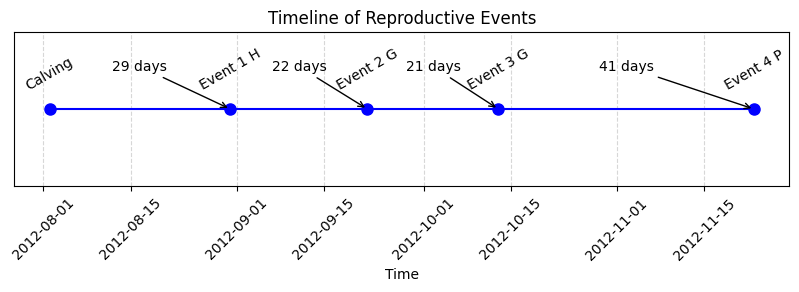

In [12]:
import matplotlib.pyplot as plt
import datetime

# Given data
dates = ["20120802", "20120831", "20120922", "20121013", "20121123"]
events = ["Calving", "Event 1 H", "Event 2 G", "Event 3 G", "Event 4 P"]

# Convert to datetime objects
dates = [datetime.datetime.strptime(date, "%Y%m%d") for date in dates]

# Calculate the differences between consecutive dates (in days)
date_differences = [(dates[i+1] - dates[i]).days for i in range(len(dates) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(dates, [1] * len(dates), "bo-", markersize=8)  # Blue dots with line

# Add event labels
for date, event in zip(dates, events):
    ax.text(date, 1.05, event, ha="center", fontsize=10, rotation=30)

# Add vertical lines and text to show the days between consecutive events
for i, diff in enumerate(date_differences):
    ax.annotate(f"{diff} days", 
                xy=(dates[i+1], 1), 
                xytext=(dates[i] + (dates[i+1] - dates[i])/2, 1.1),
                horizontalalignment='center', fontsize=10, rotation=0,
                arrowprops=dict(arrowstyle="->", lw=1))

# Formatting
ax.set_ylim(0.8, 1.2)
ax.set_yticks([])
ax.set_xlabel("Time")
ax.set_title("Timeline of Reproductive Events")
plt.xticks(rotation=45)
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


# I need to extract time of labeled subsequent reproductive events.

In [13]:
dc.sdf.head()

,Key,f5X37,f5X38,f5X52,f5X53,f5X67,f5X68,f5X82,f5X83,f5X97,...,f5X262,f5X263,f5X277,f5X278,f5X292,f5X293,f5X307,f5X308,f5X322,f5X323
0,JE 20120216,A,20120421,P,20120703,,,,,,...,,,,,,,,,,
1,JE 20161013,G,20161210,O,20170403,G,20170426,P,20170612,,...,,,,,,,,,,
2,JE 20210726,A,20211021,P,20211119,,,,,,...,,,,,,,,,,
3,JE84000006726960620160505,H,20160705,G,20160716,G,20160810,G,20160910,P,...,,,,,,,,,,
4,JE84000006754087220151208,A,20160208,P,20160311,,,,,,...,,,,,,,,,,


In [17]:
keys = dc.ColSelect(f4=None, f5=ks, key='Key')
df = dc.sdf[keys]
df.head()

,Key,f5X37,f5X38,f5X52,f5X53,f5X67,f5X68,f5X82,f5X83,f5X97,...,f5X262,f5X263,f5X277,f5X278,f5X292,f5X293,f5X307,f5X308,f5X322,f5X323
0,JE 20120216,A,20120421,P,20120703,,,,,,...,,,,,,,,,,
1,JE 20161013,G,20161210,O,20170403,G,20170426,P,20170612,,...,,,,,,,,,,
2,JE 20210726,A,20211021,P,20211119,,,,,,...,,,,,,,,,,
3,JE84000006726960620160505,H,20160705,G,20160716,G,20160810,G,20160910,P,...,,,,,,,,,,
4,JE84000006754087220151208,A,20160208,P,20160311,,,,,,...,,,,,,,,,,


In [34]:
str1 = 'Type of reproductive event'
k1 = [
    int(re.findall(r'X(\d+)', k1)[0])
    for k1 in dc.init.mapf
    for k2 in dc.init.mapf[k1]
    if (str1 in k2)
]

str2 = 'Date of reproductive event'
k2 = [
    int(re.findall(r'X(\d+)', k1)[0])
    for k1 in dc.init.mapf
    for k2 in dc.init.mapf[k1]
    if (str2 in k2)
]
k1[:3]

[37, 52, 67]

In [35]:
str1 = 'Type of reproductive event'
k3 = [
    k1
    for k1 in dc.init.mapf
    for k2 in dc.init.mapf[k1]
    if (str1 in k2)
]
k3[:3]

['f5X37', 'f5X52', 'f5X67']

In [36]:
tk = dc.ColSelect(f4=None, f5=k1, key=None)
dk = dc.ColSelect(f4=None, f5=k2, key=None)

In [37]:
from datetime import datetime

nr = len(tk)
md = {}
for row in df.itertuples(index=False):
    i = 0
    s = 1
    k = row.Key
    md[k] = {}
    while (i + s <= nr - 1):
        tri = getattr(row, tk[i])
        dri = getattr(row, dk[i])
        trf = getattr(row, tk[i + s])
        drf = getattr(row, dk[i + s])
        if not tri.isalpha() or not tri.isupper() or not dri.isdigit():
            i += 1
            continue
        elif not trf.isalpha() or not trf.isupper() or not drf.isdigit():
            s += 1
            continue
        else:
            le = str(i + 1) + tri
            ue = str(i + s + 1) + trf
            ld = datetime.strptime(dri, "%Y%m%d")
            ud = datetime.strptime(drf, "%Y%m%d")
            diff = (ud-ld).days
            cc = le + ue
            md[k][cc] = diff
            i = i + s
            s = 1 

In [38]:
md2 = {}
for k1 in md:
    k = ''
    v = []
    for k2 in md[k1]:
        if k == '':
            k += k2
            v.append(md[k1][k2])
        else:
            k += k2[2:]
            v.append(md[k1][k2])
    if k == '':
        continue
    if k not in md2.keys():
        md2[k] = [v]
    else:
        md2[k].append(v)
        
md2 = dict(sorted(md2.items(), key=lambda i: len(i[1]), reverse=True))

In [39]:
md3 = {k: len(md2[k]) for k in md2}
stp = 0
td = {}
for k in md3:
    td[k] = md3[k]
    stp += 1
    if stp == 10:
        break
td

{'1A2P': 3214,
 '1A2A3P': 1475,
 '1G2P': 1081,
 '1A2A3A4P': 612,
 '1H2A3P': 476,
 '1G2G3P': 400,
 '1A2A': 358,
 '1A2A3A4A5P': 285,
 '1H2G3P': 247,
 '1G2A3P': 210}

In [40]:
stp = 0
td = {}
for k in md2:
    td[k] = copy.deepcopy(md2[k])
    stp += 1
    if stp == 10:
        break

In [41]:
for k in td:
    if len(k) == 4:
        continue
    else:
        for l in td[k]:
            i=0
            while i+1 <= len(l) - 1:
                l[i+1] = l[i] + l[i+1]
                i+=1

In [42]:
# Second histogram:
v = []
for l in td['1A2P']:
    v += [l[0]]

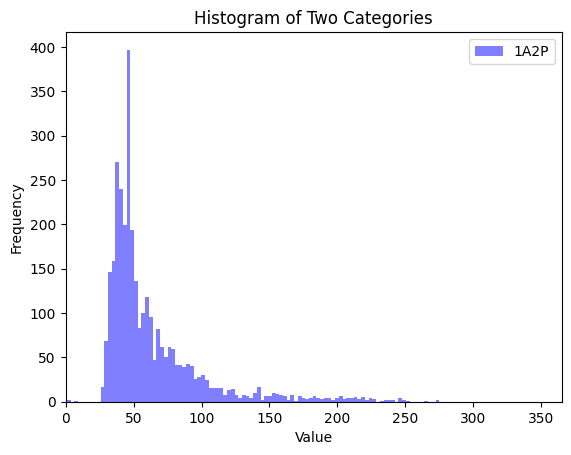

In [43]:
import matplotlib.pyplot as plt

# Example data
cat1 = v

# Plot histograms
plt.hist(cat1, bins=100, alpha=0.5, label='1A2P', color='blue')

# Add legend and labels
plt.legend()
plt.title("Histogram of Two Categories")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.xlim(0, 365)

# Show plot
plt.show()
plt.close()


In [44]:
# Second histogram:
v1 = []
v2 = []
for l in td['1A2A3P']:
    v1 += [l[0]]
    v2 += [l[1]]

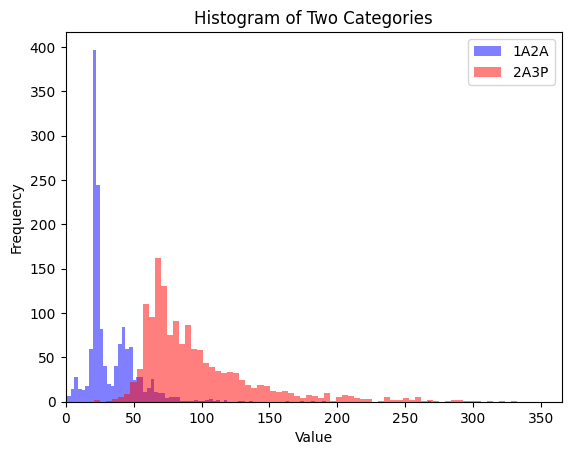

In [45]:
import matplotlib.pyplot as plt

# Example data
cat1 = v1
cat2 = v2

# Plot histograms
plt.hist(cat1, bins=100, alpha=0.5, label='1A2A', color='blue')
plt.hist(cat2, bins=100, alpha=0.5, label='2A3P', color='red')

# Add legend and labels
plt.legend()
plt.title("Histogram of Two Categories")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.xlim(0, 365)

# Show plot
plt.show()
plt.close()


In [46]:
# Second histogram:
v1 = []
v2 = []
v3 = []
for l in td['1A2A3A4P']:
    v1 += [l[0]]
    v2 += [l[1]]
    v3 += [l[2]]

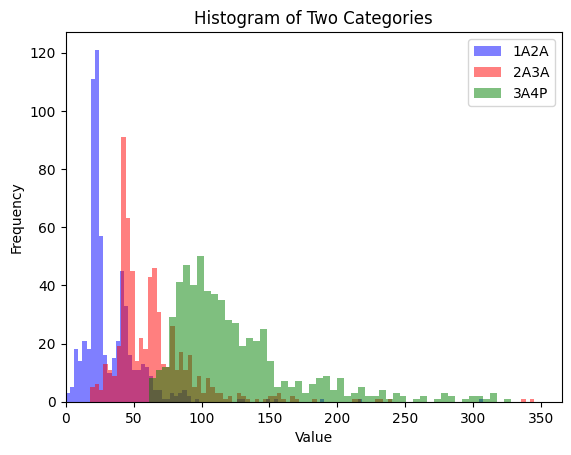

In [47]:
import matplotlib.pyplot as plt

# Example data
cat1 = v1
cat2 = v2
cat3 = v3

# Plot histograms
plt.hist(cat1, bins=100, alpha=0.5, label='1A2A', color='blue')
plt.hist(cat2, bins=100, alpha=0.5, label='2A3A', color='red')
plt.hist(cat3, bins=100, alpha=0.5, label='3A4P', color='green')

# Add legend and labels
plt.legend()
plt.title("Histogram of Two Categories")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.xlim(0, 365)

# Show plot
plt.show()
plt.close()


# Target k top categories, and save k plots, each one with $n_{i}, i \in {1, \dots, k}$ differences.

In [48]:
trk = 0
stp = 10
td = {}
for k in md2:
    td[k] = copy.deepcopy(md2[k])
    trk += 1
    if trk == stp:
        break

In [49]:
for k in td:
    if len(k) == 4:
        continue
    else:
        for l in td[k]:
            i=0
            while i+1 <= len(l) - 1:
                l[i+1] = l[i] + l[i+1]
                i+=1

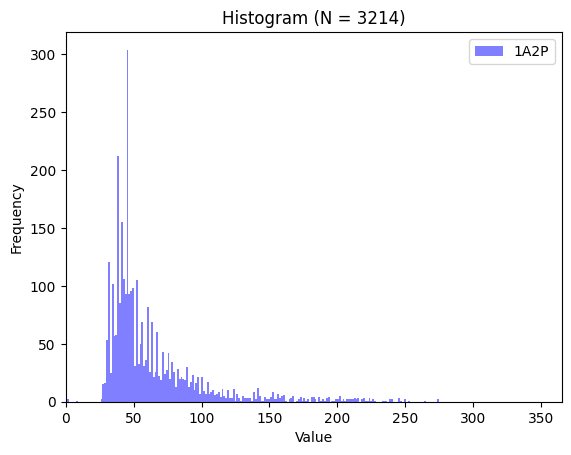

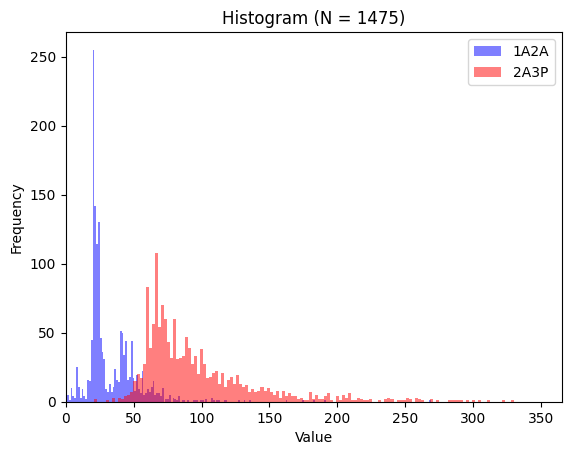

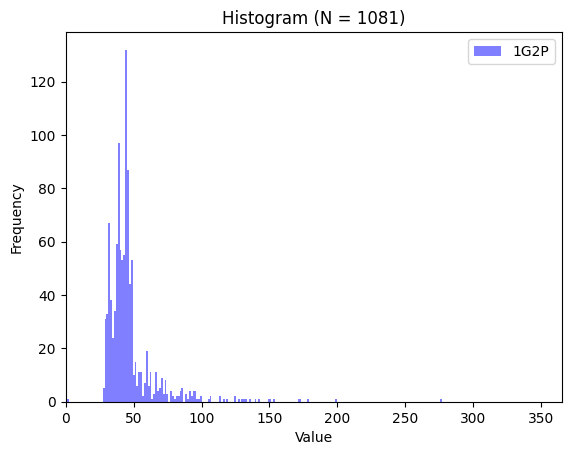

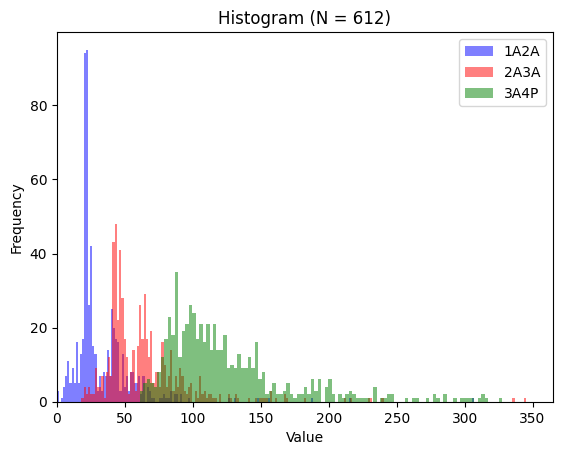

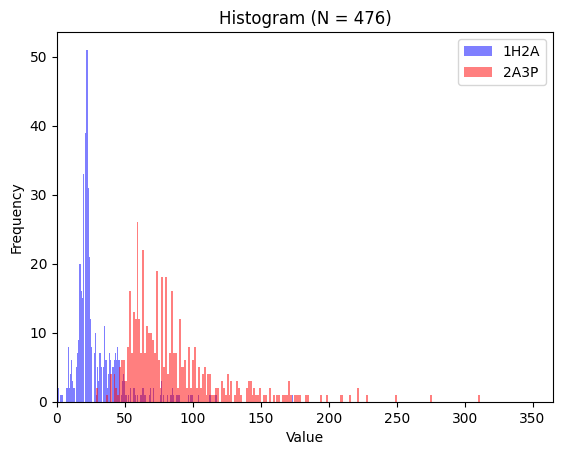

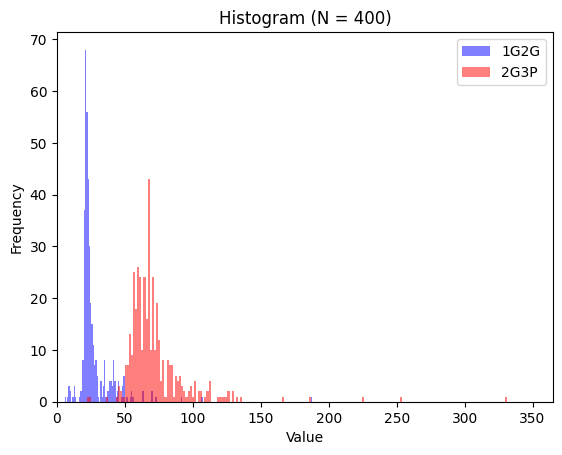

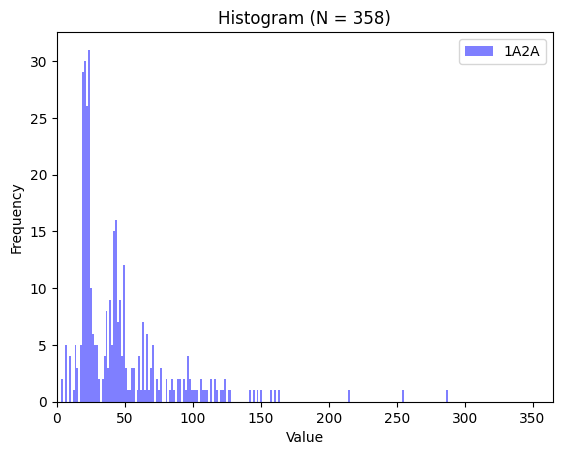

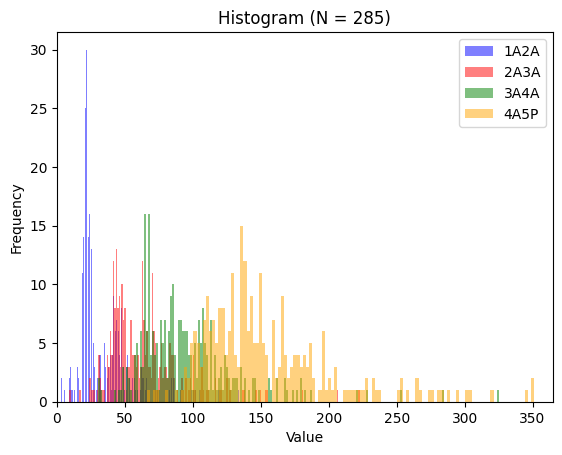

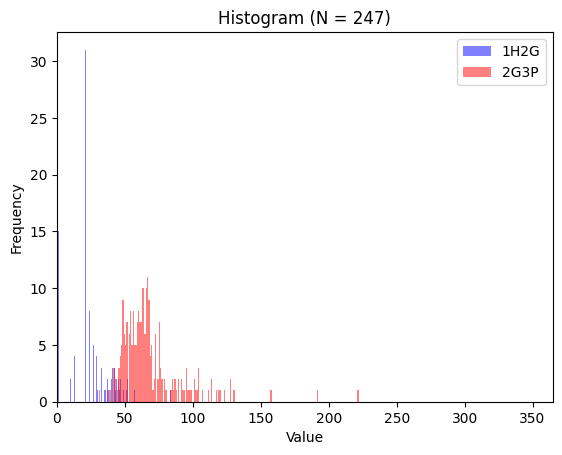

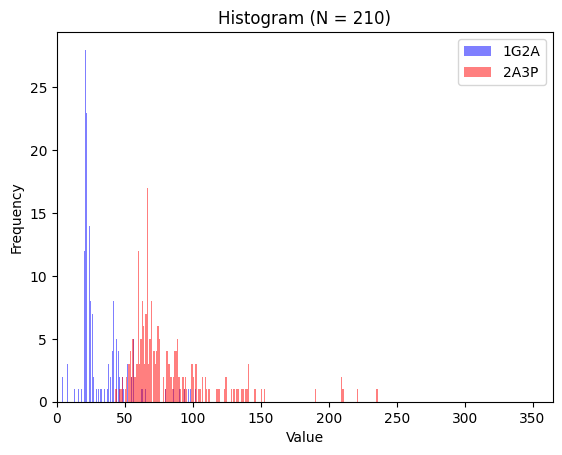

In [61]:
myc = [
    'blue','red','green','orange','purple','cyan','magenta','lime','brown','olive',
    'teal','pink','gold','navy','maroon','darkgreen','coral','indigo','darkorange','turquoise'
]

for k in td:
    for s in range(int(len(k)/2) - 1):
        ls = 0 + 2*s
        us = 4 + 2*s
        nm = k[ls:us]
        cl = myc[s]
        v = []
        for l in td[k]:
            v += [l[s]]
        plt.hist(v, bins=200, alpha=0.5, label=nm, color=cl)
    # Finalize plot
    plt.legend()
    plt.title(f"Histogram (N = {len(v)})")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.xlim(0, 365)
    plt.show()
    plt.close()

# Target 2 things:
- Long waits: 3 or more reproductive actions.
- Reproductive event starts. Then confirmed Pregnant. Subsequently reproductive event restart.

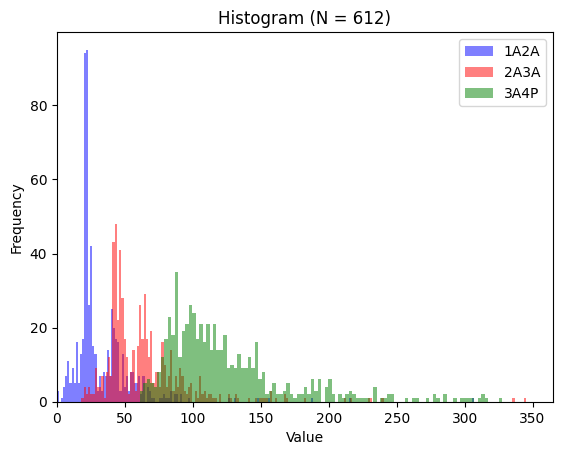

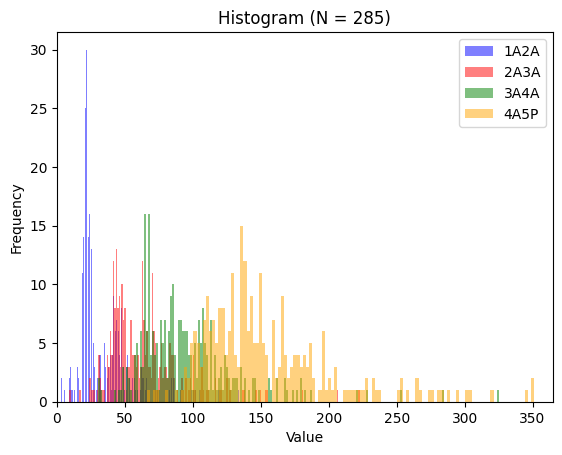

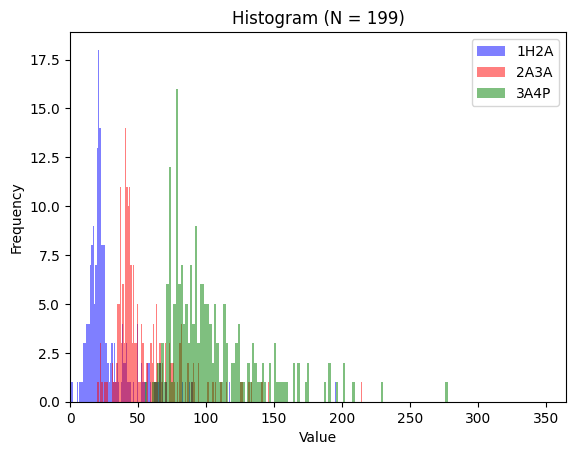

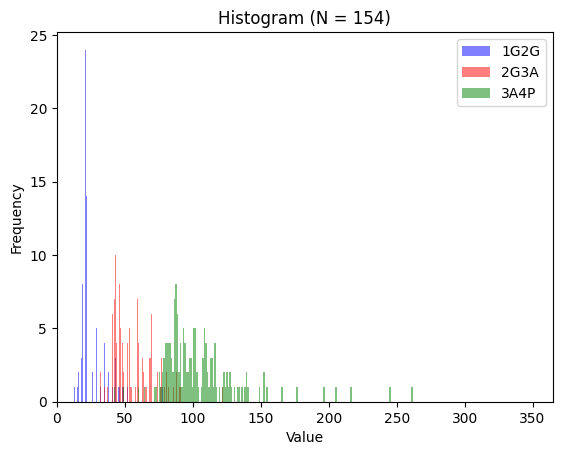

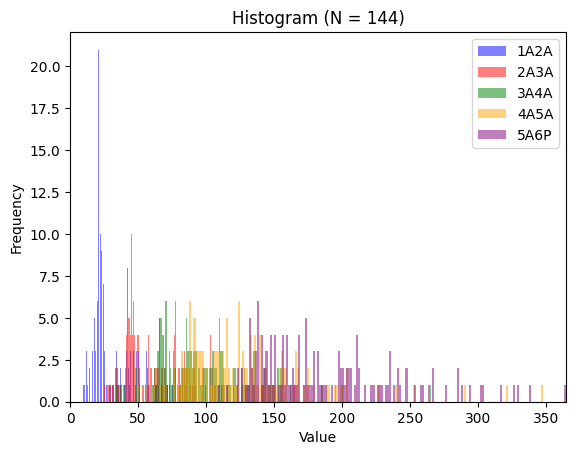

In [70]:
trk = 0
stp = 5
td = {}
for k in md2:
    if 'P' not in k[:-1] and len(k) >= 8:
        td[k] = copy.deepcopy(md2[k])
        trk += 1
        if trk == stp:
            break
for k in td:
    if len(k) == 4:
        continue
    else:
        for l in td[k]:
            i=0
            while i+1 <= len(l) - 1:
                l[i+1] = l[i] + l[i+1]
                i+=1
for k in td:
    for s in range(int(len(k)/2) - 1):
        ls = 0 + 2*s
        us = 4 + 2*s
        nm = k[ls:us]
        cl = myc[s]
        v = []
        for l in td[k]:
            v += [l[s]]
        plt.hist(v, bins=200, alpha=0.5, label=nm, color=cl)
    # Finalize plot
    plt.legend()
    plt.title(f"Histogram (N = {len(v)})")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.xlim(0, 365)
    plt.show()
    plt.close()

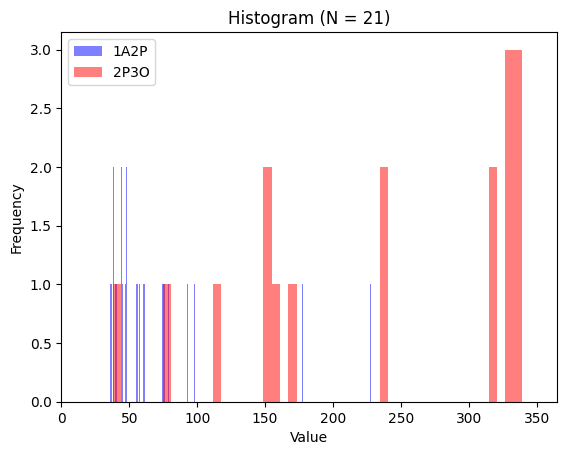

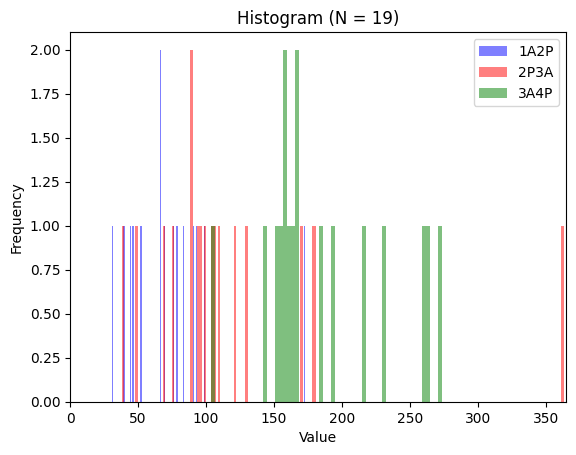

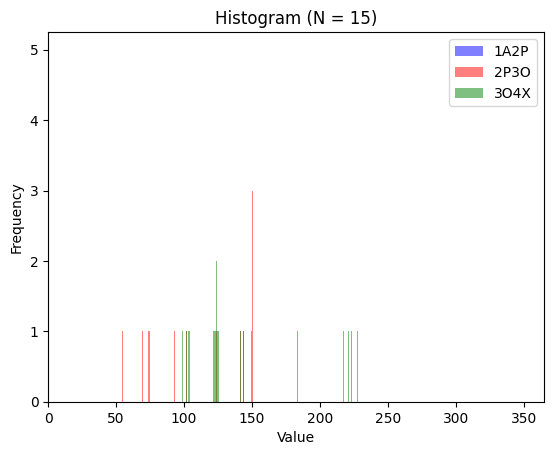

In [72]:
trk = 0
stp = 3
td = {}
for k in md2:
    if 'P' in k[:-1]:
        td[k] = copy.deepcopy(md2[k])
        trk += 1
        if trk == stp:
            break
for k in td:
    if len(k) == 4:
        continue
    else:
        for l in td[k]:
            i=0
            while i+1 <= len(l) - 1:
                l[i+1] = l[i] + l[i+1]
                i+=1

for k in td:
    for s in range(int(len(k)/2) - 1):
        ls = 0 + 2*s
        us = 4 + 2*s
        nm = k[ls:us]
        cl = myc[s]
        v = []
        for l in td[k]:
            v += [l[s]]
        plt.hist(v, bins=200, alpha=0.5, label=nm, color=cl)
    # Finalize plot
    plt.legend()
    plt.title(f"Histogram (N = {len(v)})")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.xlim(0, 365)
    plt.show()
    plt.close()

In [64]:
stp = 5
tck = 0
for k in md2:
    if 'P' in k[:-1]:
        if tck >= stp:
            break
        print(k)
        tck += 1

1A2P3O
1A2P3A4P
1A2P3O4X
1G2P3O
1A2P3O4A5P
